In [1]:
import h5py


In [ ]:
binned = h5py.File('data/Visium_HD_Human_Lung_Cancer_binned_outputs.tar.gz')

In [2]:
feature_slice = h5py.File('data/Visium_HD_Human_Lung_Cancer_feature_slice.h5')

In [4]:
feature_slice.keys()

<KeysViewHDF5 ['feature_slices', 'features', 'images', 'masks', 'reads', 'secondary_analysis', 'umis']>

In [ ]:
feature_slice.keys()

In [7]:
import squidpy

In [38]:
import squidpy
from pathlib import Path
v = squidpy.read.visium(
    'data/binned_outputs/square_016um/', 
     source_image_path='data/Visium_HD_Human_Lung_Cancer_image.tif',
     counts_file='raw_feature_bc_matrix/matrix.mtx.gz',
     library_id='library_id'
     )

FileNotFoundError: [Errno 2] No such file or directory: '/home/cosmo/10x_spatial_AI/data/binned_outputs/square_016um/raw_feature_bc_matrix/spatial/tissue_hires_image.png'

In [34]:
ls data/binned_outputs/square_016um/

analysis/                       raw_feature_bc_matrix/
filtered_feature_bc_matrix/     raw_feature_bc_matrix.h5*
filtered_feature_bc_matrix.h5*  spatial/


In [13]:
v

AnnData object with n_obs × n_vars = 152048 × 18085
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [5]:
v.obs

,in_tissue,array_row,array_col
s_016um_00052_00082-1,1,52,82
s_016um_00010_00367-1,1,10,367
s_016um_00163_00399-1,1,163,399
s_016um_00238_00388-1,1,238,388
s_016um_00144_00175-1,1,144,175
...,...,...,...
s_016um_00375_00231-1,1,375,231
s_016um_00109_00223-1,1,109,223
s_016um_00039_00175-1,1,39,175
s_016um_00037_00193-1,1,37,193


In [27]:
v.obs.in_tissue.value_counts()

in_tissue
1    152048
Name: count, dtype: int64

In [28]:
v.var

,gene_ids,feature_types,genome
SAMD11,ENSG00000187634,Gene Expression,GRCh38
NOC2L,ENSG00000188976,Gene Expression,GRCh38
KLHL17,ENSG00000187961,Gene Expression,GRCh38
PLEKHN1,ENSG00000187583,Gene Expression,GRCh38
PERM1,ENSG00000187642,Gene Expression,GRCh38
...,...,...,...
MT-ND4L,ENSG00000212907,Gene Expression,GRCh38
MT-ND4,ENSG00000198886,Gene Expression,GRCh38
MT-ND5,ENSG00000198786,Gene Expression,GRCh38
MT-ND6,ENSG00000198695,Gene Expression,GRCh38


In [16]:
# fullres coordinates appear to be stored here still
# each row in this array is (pxl_col_in_fullres, pxl_row_in_fullres)
v.obsm['spatial'].shape

(152048, 2)

In [18]:
v.obsm['spatial']

array([[17215.29980692,  7043.83142709],
       [ 3171.04795098,  5064.43653414],
       [ 1642.78727733, 12606.90272554],
       ...,
       [12632.63643814,  6432.64238193],
       [11745.83103675,  6339.758145  ],
       [ 5083.22257936, 11649.78446082]])

In [8]:
v.uns

OrderedDict([('spatial',
              {'Visium_HD_Human_Lung_Cancer': {'metadata': {'chemistry_description': 'Visium HD v1',
                 'software_version': 'spaceranger-3.0.0'},
                'images': {'hires': array([[[2, 2, 0],
                         [2, 2, 0],
                         [2, 2, 0],
                         ...,
                         [0, 2, 0],
                         [2, 2, 0],
                         [2, 2, 0]],
                 
                        [[2, 2, 0],
                         [2, 2, 0],
                         [2, 2, 0],
                         ...,
                         [2, 2, 0],
                         [2, 2, 0],
                         [2, 2, 0]],
                 
                        [[2, 2, 0],
                         [2, 2, 0],
                         [2, 2, 0],
                         ...,
                         [0, 2, 0],
                         [2, 2, 0],
                         [2, 2, 0]],
                 
 

In [17]:
# spot_diameter_fullres is the conversion factor from row/column number back to pixels
v.uns['spatial']['Visium_HD_Human_Lung_Cancer']['scalefactors']

{'spot_diameter_fullres': 49.23346466602791,
 'bin_size_um': 16.0,
 'microns_per_pixel': 0.3249822068898662,
 'regist_target_img_scalef': 0.24899365,
 'tissue_lowres_scalef': 0.024899365,
 'fiducial_diameter_fullres': 1015.4402087368256,
 'tissue_hires_scalef': 0.24899365}

In [10]:
v.uns['spatial']['scalefactors']

KeyError: 'scalefactors'

In [ ]:
'''
Visium_HD_Human_Lung_Cancer_image.tif TIFF 3200x3000 3200x3000+0+0 8-bit sRGB 20.5016MiB 0.000u 0:00.023
Visium_HD_Human_Lung_Cancer_tissue_image.tif[0] TIFF 21234x24097 21234x24097+0+0 16-bit Grayscale Gray 2.85921GiB 0.010u 0:00.003
Visium_HD_Human_Lung_Cancer_tissue_image.tif[1] TIFF 21234x24097 21234x24097+0+0 16-bit Grayscale Gray 0.000u 0:00.001
Visium_HD_Human_Lung_Cancer_tissue_image.tif[2] TIFF 21234x24097 21234x24097+0+0 16-bit Grayscale Gray 0.000u 0:00.000
'''

In [20]:
tp="data/binned_outputs/square_016um/spatial/tissue_positions.parquet"

In [21]:
import pandas as pd

In [24]:
df=pd.read_parquet(tp)
df

,barcode,in_tissue,array_row,array_col,pxl_row_in_fullres,pxl_col_in_fullres
0,s_016um_00000_00000-1,0,0,0,4458.339849,21236.291085
1,s_016um_00000_00001-1,0,0,1,4458.649875,21187.058355
2,s_016um_00000_00002-1,0,0,2,4458.959900,21137.825626
3,s_016um_00000_00003-1,0,0,3,4459.269926,21088.592898
4,s_016um_00000_00004-1,0,0,4,4459.579951,21039.360172
...,...,...,...,...,...,...
175556,s_016um_00418_00414-1,0,418,414,25166.145782,982.905466
175557,s_016um_00418_00415-1,0,418,415,25166.455549,933.671834
175558,s_016um_00418_00416-1,0,418,416,25166.765317,884.438204
175559,s_016um_00418_00417-1,0,418,417,25167.075085,835.204575


In [26]:
df[df.barcode=='s_016um_00052_00082-1']

,barcode,in_tissue,array_row,array_col,pxl_row_in_fullres,pxl_col_in_fullres
21870,s_016um_00052_00082-1,1,52,82,7043.831427,17215.299807


In [25]:
df.set_index('barcode')

,in_tissue,array_row,array_col,pxl_row_in_fullres,pxl_col_in_fullres
barcode,,,,,
s_016um_00000_00000-1,0,0,0,4458.339849,21236.291085
s_016um_00000_00001-1,0,0,1,4458.649875,21187.058355
s_016um_00000_00002-1,0,0,2,4458.959900,21137.825626
s_016um_00000_00003-1,0,0,3,4459.269926,21088.592898
s_016um_00000_00004-1,0,0,4,4459.579951,21039.360172
...,...,...,...,...,...
s_016um_00418_00414-1,0,418,414,25166.145782,982.905466
s_016um_00418_00415-1,0,418,415,25166.455549,933.671834
s_016um_00418_00416-1,0,418,416,25166.765317,884.438204


In [6]:
21187.058355-21236.291085

-49.23272999999972

In [16]:
df.columns

Index(['barcode', 'in_tissue', 'array_row', 'array_col', 'pxl_row_in_fullres',
       'pxl_col_in_fullres'],
      dtype='object')

In [10]:
#pip install 

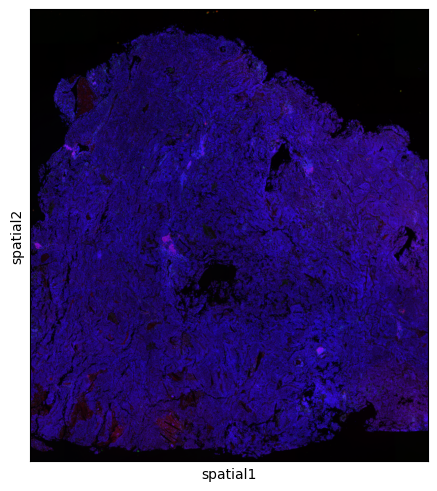

In [30]:
squidpy.pl.spatial_scatter(v)

In [39]:
import h5py
h5 = h5py.File('/home/cosmo/10x_spatial_AI/data/binned_outputs/square_002um/raw_feature_bc_matrix.h5')
h5.keys()

<KeysViewHDF5 ['matrix']>

In [41]:
h5['matrix'].keys()

<KeysViewHDF5 ['barcodes', 'data', 'features', 'indices', 'indptr', 'shape']>

In [71]:
h5['matrix']['barcodes'], h5['matrix']['barcodes'][0]

(<HDF5 dataset "barcodes": shape (10511863,), type "|S45">,
 b's_002um_00000_00000-1')

In [59]:
h5['matrix']['features'].keys()

<KeysViewHDF5 ['_all_tag_keys', 'feature_type', 'genome', 'id', 'name', 'target_sets']>

In [68]:
h5['matrix']['features']['name'][0:5]

array([b'MIR1302-2HG', b'FAM138A', b'OR4F5', b'AL627309.1', b'AL627309.3'],
      dtype='|S256')

In [53]:
h5['matrix']['data'], h5['matrix']['data'][0:5]

(<HDF5 dataset "data": shape (237692790,), type "<i4">,
 array([1, 1, 1, 1, 1], dtype=int32))

In [55]:
h5['matrix']['data'], h5['matrix']['data'][:].max()

(<HDF5 dataset "data": shape (237692790,), type "<i4">, 268)

In [56]:
h5['matrix']['data'], h5['matrix']['data'][:].min()

(<HDF5 dataset "data": shape (237692790,), type "<i4">, 1)

In [69]:
h5['matrix']['shape'], h5['matrix']['shape'][:]

(<HDF5 dataset "shape": shape (2,), type "<i4">,
 array([   37082, 10511863], dtype=int32))

In [70]:
37082*10511863

389800903766

In [52]:
h5['matrix']['indices']

<HDF5 dataset "indices": shape (237692790,), type "<i8">